## Supervised Machine Learning Model for Head Motion Recognition Wheelchair

This model is majorly focused on handicapped people. We know that it is really difficult to be dependent on someone. We hope that this model will make people more independent and will also make one’s life beautiful. We are considering the people who are unable to walk and use a wheelchair for their mobility. We are planning to make their wheelchair a smart wheelchair. \
The results of this model are obtained by using Arduino Uno, Jupyter/Spyder, Arduino IDE, Servo motor and Accelerometer (MPU6050), jumper wires. \
We used an accelerometer to get the reading of the motion of the head. It is done by deploying an accelerometer in a cap which a patient should wear to control the wheelchair. We created a dataset of directions LEFT, RIGHT, FORWARD, BACKWARD to get training data. \
Here, in this Jupyter Notebook accuracy has been obtained. 

The machine learning algorithm will predict and decide the direction of the movement of the wheelchair as the head of the patient is moved in likewise direction. 


In [1]:
# Import the required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import sklearn 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import r2_score
%matplotlib inline
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from IPython.core.display import HTML
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
import collections

C:\Users\garim\Anaconda2020\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
# Enter the dataset file from your computer
import tkinter as tk
from tkinter.filedialog import askopenfilename
root = tk.Tk() 
fileName = askopenfilename(filetypes=(("Excel Files","*.xlsx"),("CSV Files","*.csv"))) 
print(fileName)
root.withdraw()

C:/Users/garim/OneDrive/Desktop/MINOR PROJECT/python_minor_project/TRAIN.xlsx


''

In [3]:
# Read the Excel File into a dataframe
df = pd.read_excel(fileName)
df.tail()

,X,Y,Z,OUTPUT
19995,-6.541996,-0.526904,7.018605,BACKWARD
19996,-6.543193,-0.525707,7.006630,BACKWARD
19997,-6.546786,-0.470621,6.943162,BACKWARD
19998,-6.618636,-0.447869,6.956334,BACKWARD
19999,-6.580316,-0.414338,6.950347,BACKWARD


In [4]:
# Statistical Description of dataset
df.describe()

,X,Y,Z
count,20000.000000,20000.000000,20000.000000
mean,1.250460,0.873947,8.216507
std,4.414326,1.624470,1.285738
min,-7.290439,-2.863246,4.453539
25%,-0.174836,-0.602347,7.038962
50%,2.312391,0.639470,8.719069
75%,3.549718,2.714755,9.333391
max,8.182584,4.471501,11.705658


In [5]:
# Rename the columns of the dataframe
df.rename(columns = {'OUTPUT':'directions','X':'x_axis','Y':'y_axis','Z':'z_axis'}, inplace=True)
df.head()

,x_axis,y_axis,z_axis,directions
0,0.483794,1.313668,9.575288,RIGHT
1,0.487386,1.284928,9.560918,RIGHT
2,0.477806,1.292113,9.582473,RIGHT
3,0.474214,1.295706,9.612411,RIGHT
4,0.483794,1.271755,9.511820,RIGHT


In [6]:
# Conversion of categorical dependent variable in the target to numbers
df['directions'] = df['directions'].replace(['RIGHT','LEFT','FORWARD','BACKWARD'],[1,2,3,4])
df.head()

,x_axis,y_axis,z_axis,directions
0,0.483794,1.313668,9.575288,1
1,0.487386,1.284928,9.560918,1
2,0.477806,1.292113,9.582473,1
3,0.474214,1.295706,9.612411,1
4,0.483794,1.271755,9.511820,1


### Visualization

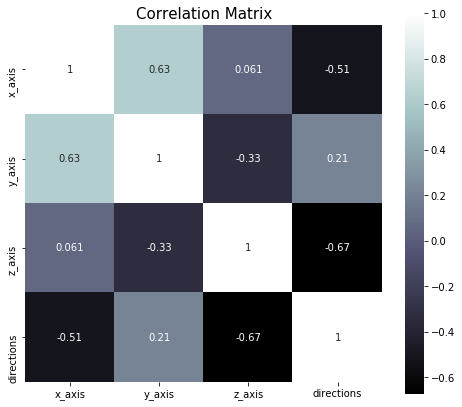

In [7]:
# Visualization
corr = df.corr()
plt.figure( figsize=(8,7))
sns.heatmap(data = corr, cmap = 'bone', square=True, annot=True)
plt.title('Correlation Matrix',fontsize=15)
plt.show()

<I>We plotted a correlation matrix for calculating the feature on which directions have maximum dependency. \
Here, the x-axis and z-axis have the maximum dependency on the different directions as can be seen in the above plot.</I>

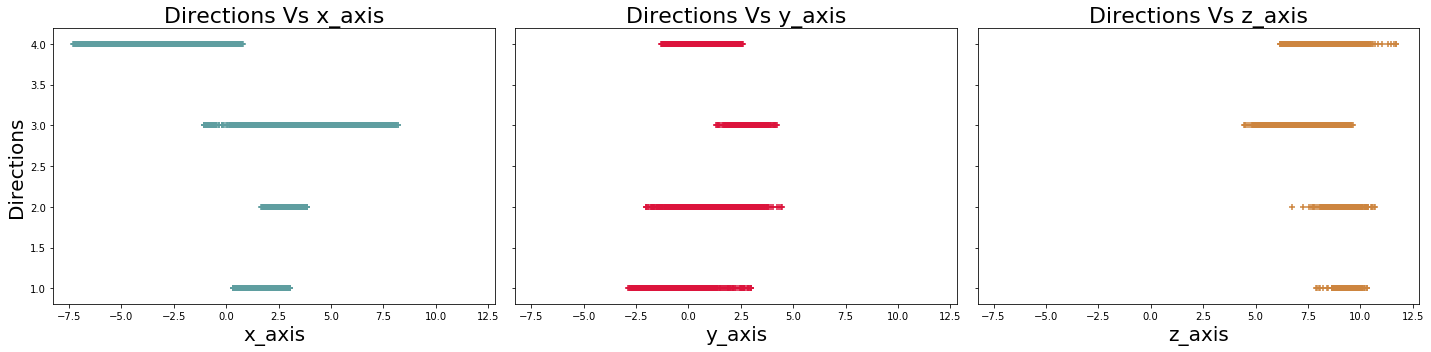

In [8]:
# Scatter Plot of axis with directions.
value = ['x_axis', 'y_axis', 'z_axis']
color = ['cadetblue','crimson','peru']

fig, axes = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(20,5))
sub = [0,1,2]

for val,c,num in zip(value,color,sub):
    axes[num].scatter(df[val], df['directions'], color=c, marker='+')    
    axes[num].set_title('Directions Vs {}'.format(val), fontsize=22)
    axes[num].set_xlabel(val, fontsize=20)
    axes[0].set_ylabel('Directions', fontsize=20)    
    
plt.tight_layout()

<I>In the scatter plot we can analyze how the 4 directions are divided among the x, y and z axis.</I>

## Classification

### Train-Test Split

In [9]:
# Defining the input and target data
X = df[['x_axis','y_axis','z_axis']] 
y = df[['directions']]

# Train_Test_Split
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [10]:
# summarize the dataset
y = np.ravel(y)
print(X.shape, y.shape)

(20000, 3) (20000,)


### Ensemble Bagged Trees

#### Cross Validation used Ensemble Bagged Trees

In [11]:
# evaluate bagging algorithm for classification

# define the model
model_bg = BaggingClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores_bg = cross_val_score(model_bg, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Standard Deviation of Bagging: %.3f' % ( np.std(n_scores_bg)))
cvscore_bg = np.mean(n_scores_bg)*100
print('Accuracy of Bagging: %.3f ' % (cvscore_bg))

Standard Deviation of Bagging: 0.004
Accuracy of Bagging: 96.848 


#### Train Test Split used in Ensemble Bagged Trees

In [12]:
model_bg.fit(X_train, np.ravel(Y_train))

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [13]:
y_pred_bg = model_bg.predict(X_test)

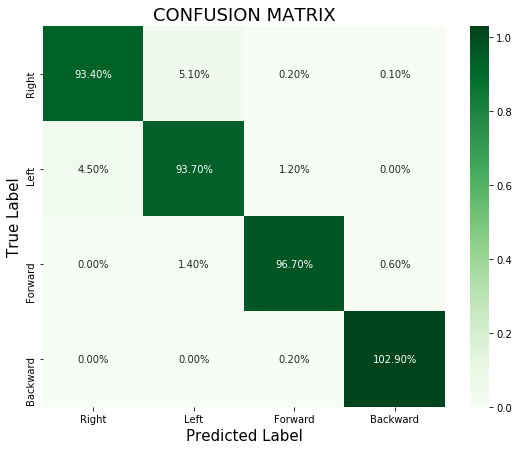

In [14]:
cf_matrix = confusion_matrix(Y_test, y_pred_bg)
plt.figure( figsize=(9, 7), facecolor='w', edgecolor='k')
sns.heatmap(cf_matrix/(np.sum(cf_matrix)/4),cmap ='Greens', annot= True, fmt='.2%', 
            xticklabels=['Right', 'Left', 'Forward','Backward'], yticklabels=['Right', 'Left', 'Forward','Backward'])
plt.xlabel('Predicted Label', fontsize=15)
plt.ylabel('True Label', fontsize=15)
plt.title('CONFUSION MATRIX', fontsize=18)
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [15]:
print(classification_report(Y_test, y_pred_bg))

              precision    recall  f1-score   support

           1       0.95      0.95      0.95       988
           2       0.94      0.94      0.94       994
           3       0.98      0.98      0.98       987
           4       0.99      1.00      1.00      1031

    accuracy                           0.97      4000
   macro avg       0.97      0.97      0.97      4000
weighted avg       0.97      0.97      0.97      4000



In [16]:
bg_score = accuracy_score(Y_test, y_pred_bg)*100
print("Accuracy Score of Ensemble Bagged Tree:", bg_score)

Accuracy Score of Ensemble Bagged Tree: 96.675


### ADABOOST

#### Cross Validation used ADABOOST

In [17]:
# AdaBoost Classification
num_trees = 30
kfold = model_selection.KFold(n_splits=10)
model_ada = AdaBoostClassifier(n_estimators=num_trees)
scores_ada = model_selection.cross_val_score(model_ada, X, y, cv=kfold)
cvscore_ada =scores_ada.mean()*100
print('Accuracy of ADABOOST: %.3f' % (cvscore_ada))

Accuracy of ADABOOST: 77.590


#### Train-Test Split using ADABOOST

In [18]:
model_ada.fit(X_train, np.ravel(Y_train))

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=30, random_state=None)

In [19]:
y_pred_ada = model_ada.predict(X_test)

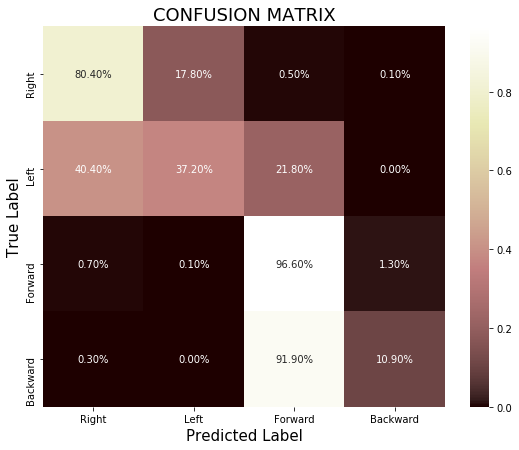

In [20]:
cf_matrix = confusion_matrix(Y_test, y_pred_ada)
plt.figure( figsize=(9, 7), facecolor='w', edgecolor='k')
sns.heatmap(cf_matrix/(np.sum(cf_matrix)/4),cmap ='pink', annot= True, fmt='.2%',
            xticklabels=['Right', 'Left', 'Forward','Backward'], yticklabels=['Right', 'Left', 'Forward','Backward'])
plt.xlabel('Predicted Label', fontsize=15)
plt.ylabel('True Label', fontsize=15)
plt.title('CONFUSION MATRIX', fontsize=18)
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [21]:
print(classification_report(Y_test, y_pred_ada))

              precision    recall  f1-score   support

           1       0.66      0.81      0.73       988
           2       0.68      0.37      0.48       994
           3       0.46      0.98      0.62       987
           4       0.89      0.11      0.19      1031

    accuracy                           0.56      4000
   macro avg       0.67      0.57      0.51      4000
weighted avg       0.67      0.56      0.50      4000



In [22]:
ada_score = accuracy_score(Y_test, y_pred_ada)*100
print("Accuracy Score of Ensemble Boosted Tree:", ada_score)

Accuracy Score of Ensemble Boosted Tree: 56.275


### K Nearest Neighbors

#### Cross Validation used K Nearest Neighbors

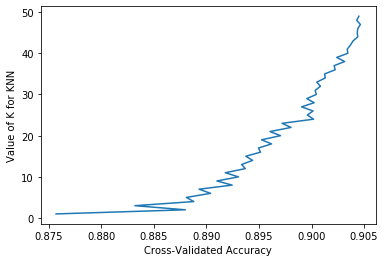

0.90465
49.0


In [23]:
# choose k between 1 to 31
k_range = range(1, 50)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_scores, k_range)
plt.ylabel('Value of K for KNN')
plt.xlabel('Cross-Validated Accuracy')
plt.show()

print(np.amax(k_scores))
print(np.interp(np.amax(k_scores),k_scores,k_range))

In [24]:
val = int(np.interp(np.amax(k_scores),k_scores,k_range))
# use the same model as before
knn = KNeighborsClassifier(n_neighbors = val)
# X,y will automatically devided by 5 folder, the scoring I will still use the accuracy
scores_knn = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
# print all 5 times scores 
cvscore_knn = np.mean(scores_knn)*100
print('Accuracy of K-Nearest Neighbors: %.3f' % (cvscore_knn))

Accuracy of K-Nearest Neighbors: 90.450


#### Train-Test Split for K Nearest Neighbors

In [25]:
knn.fit(X_train, np.ravel(Y_train))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=49, p=2,
                     weights='uniform')

In [26]:
y_pred_knn = knn.predict(X_test)

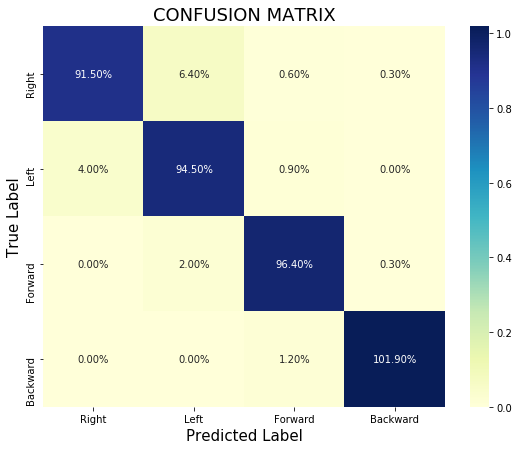

In [27]:
cf_matrix = confusion_matrix(Y_test, y_pred_knn)
plt.figure( figsize=(9, 7), facecolor='w', edgecolor='k')
sns.heatmap(cf_matrix/(np.sum(cf_matrix)/4),cmap ='YlGnBu', annot= True, fmt='.2%',
            xticklabels=['Right', 'Left', 'Forward','Backward'], yticklabels=['Right', 'Left', 'Forward','Backward'])
plt.xlabel('Predicted Label', fontsize=15)
plt.ylabel('True Label', fontsize=15)
plt.title('CONFUSION MATRIX', fontsize=18)
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [28]:
print(classification_report(Y_test, y_pred_knn))

              precision    recall  f1-score   support

           1       0.96      0.93      0.94       988
           2       0.92      0.95      0.93       994
           3       0.97      0.98      0.97       987
           4       0.99      0.99      0.99      1031

    accuracy                           0.96      4000
   macro avg       0.96      0.96      0.96      4000
weighted avg       0.96      0.96      0.96      4000



In [29]:
knn_score = accuracy_score(Y_test, y_pred_knn)*100
print("Accuracy Score of Ensemble Boosted Tree:", knn_score)

Accuracy Score of Ensemble Boosted Tree: 96.075


### DECISION TREE

#### Cross Validation used in Decision Tree

In [30]:
DTC = DecisionTreeClassifier()
scores_dtc = cross_val_score(DTC, X, y, cv=5, scoring='accuracy')
cvscore_dtc = np.mean(scores_dtc)*100
print('Accuracy of Decision Tree Classifier: %.3f' % (cvscore_dtc))

Accuracy of Decision Tree Classifier: 88.525


#### Train Test Split in Decision Trees

In [31]:
DTC.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [32]:
y_pred_dtc = DTC.predict(X_test)

In [33]:
print(confusion_matrix(Y_test, y_pred_dtc))

[[ 919   67    2    0]
 [  55  927   12    0]
 [   0   13  967    7]
 [   1    0    2 1028]]


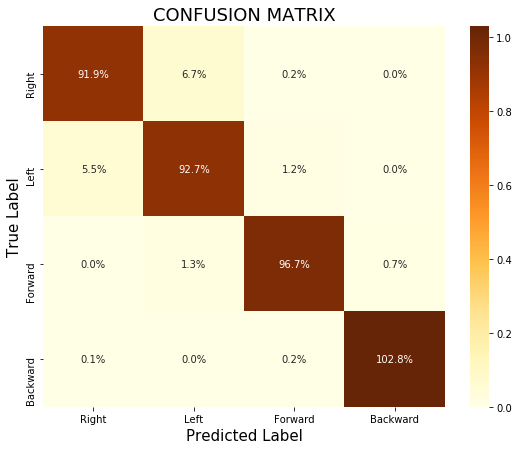

In [34]:
cf_matrix = confusion_matrix(Y_test, y_pred_dtc)
plt.figure( figsize=(9, 7), facecolor='w', edgecolor='k')
sns.heatmap(cf_matrix/(np.sum(cf_matrix)/4), cmap = 'YlOrBr', annot= True, fmt='.1%',
            xticklabels=['Right', 'Left', 'Forward','Backward'], yticklabels=['Right', 'Left', 'Forward','Backward'])
plt.xlabel('Predicted Label', fontsize=15)
plt.ylabel('True Label', fontsize=15)
plt.title('CONFUSION MATRIX', fontsize=18)
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [35]:
score_dtc = accuracy_score(Y_test, y_pred_dtc)*100
print("Accuracy Score of Decision Trees:", score_dtc )

Accuracy Score of Decision Trees: 96.025


In [36]:
print(classification_report(Y_test, y_pred_dtc))

              precision    recall  f1-score   support

           1       0.94      0.93      0.94       988
           2       0.92      0.93      0.93       994
           3       0.98      0.98      0.98       987
           4       0.99      1.00      1.00      1031

    accuracy                           0.96      4000
   macro avg       0.96      0.96      0.96      4000
weighted avg       0.96      0.96      0.96      4000



##### Presentation of Decision Trees

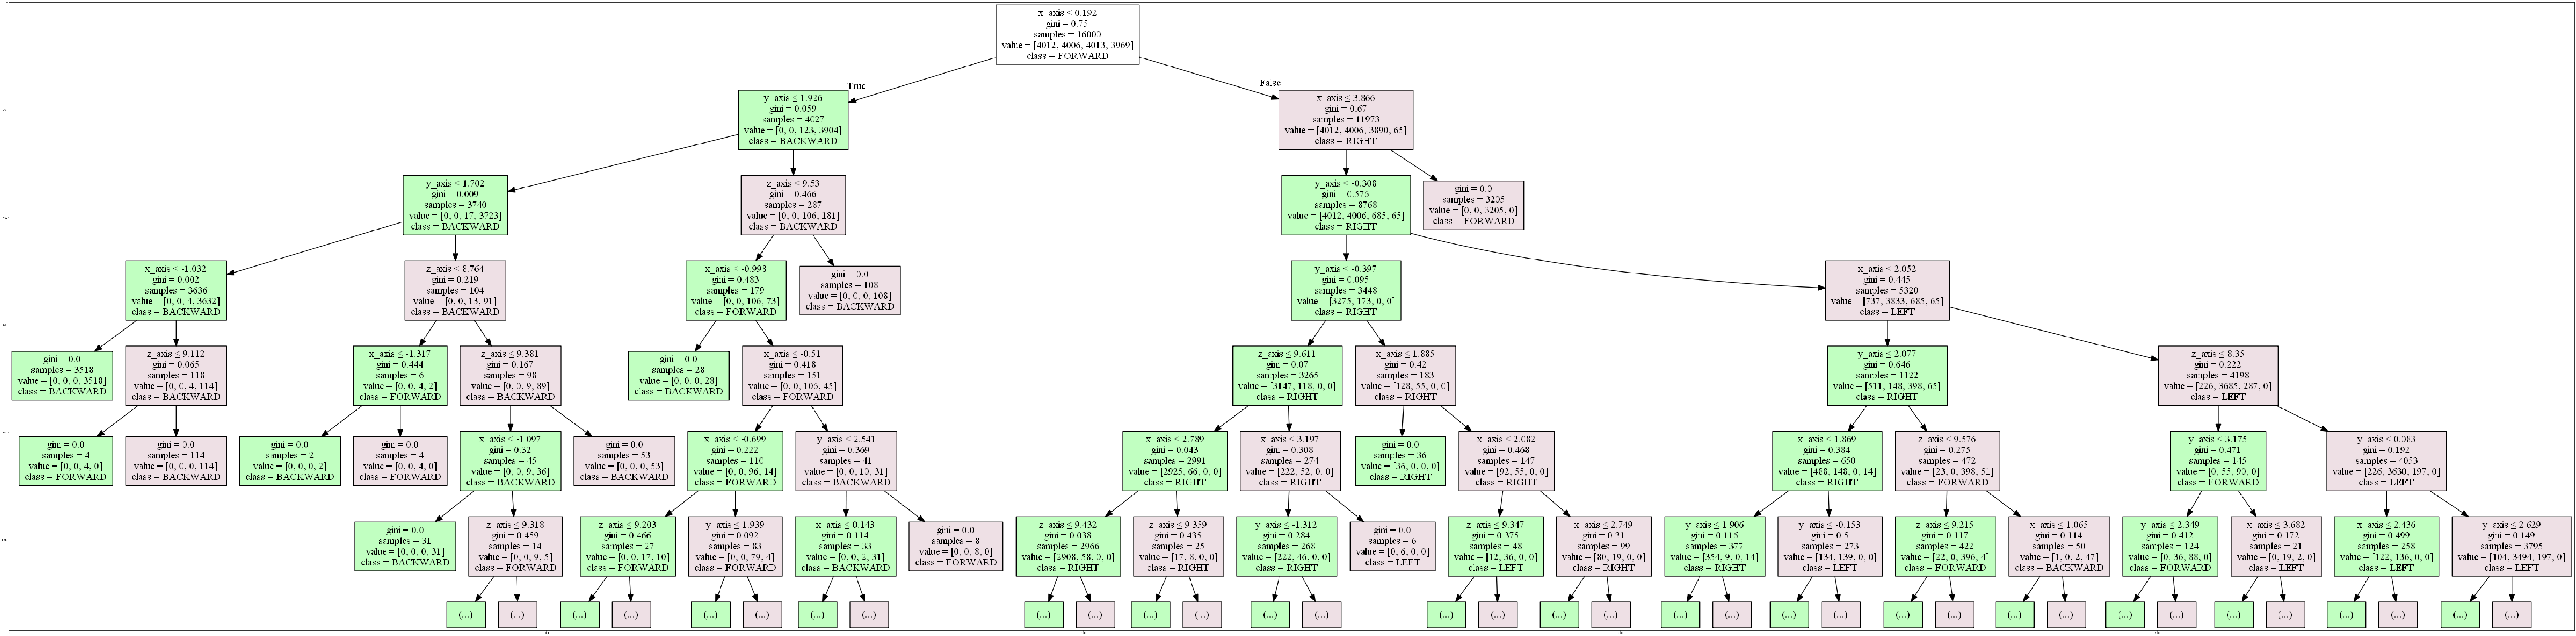

In [37]:
df['directions'] = df['directions'].replace([1,2,3,4],['RIGHT','LEFT','FORWARD','BACKWARD'])
features = df.columns[0:3]
targetNames = df["directions"].unique().tolist()

dot_data = StringIO() #forms an empty file
filename = "direc_tree.png"
out=tree.export_graphviz(DTC,feature_names=features, out_file=dot_data, class_names= targetNames, filled=True,  max_depth=6, special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# To change the colors of confusion matrix
colors = ('darkseagreen1', 'lavenderblush2')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(200, 300))
plt.imshow(img)

In [38]:
df['directions'] = df['directions'].replace(['RIGHT','LEFT','FORWARD','BACKWARD'], [1,2,3,4])

### Support Vector Machine

#### Support Vector Machine - Linear

In [39]:
from sklearn import svm
svm = svm.SVC(kernel='linear')
# 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed' 
scores_lin = cross_val_score(svm, X, y, cv=5, scoring='accuracy')
cvscore_lin = np.mean(scores_lin)*100
print('Accuracy of Support Vector Machine with linear kernel: %.3f' % (cvscore_lin))

Accuracy of Support Vector Machine with linear kernel: 86.370


#### Support Vector Machine - Sigmoid

In [40]:
from sklearn import svm
svm = svm.SVC(kernel='sigmoid')
# 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed' 
scores_sig = cross_val_score(svm, X, y, cv=5, scoring='accuracy')
cvscore_sig = np.mean(scores_sig)*100
print('Accuracy of Support Vector Machine with sigmoid kernel: %.3f' % (cvscore_sig))

Accuracy of Support Vector Machine with sigmoid kernel: 75.840


#### Support Vector Machine - Poly

In [41]:
from sklearn import svm
svm = svm.SVC(kernel='poly')
# 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed' 
scores_pol = cross_val_score(svm, X, y, cv=5, scoring='accuracy')
cvscore_pol = np.mean(scores_pol)*100
print('Accuracy of Support Vector Machine with poly kernel: %.3f' % (cvscore_pol))

Accuracy of Support Vector Machine with poly kernel: 88.555


#### Support Vector Machine - RBF

In [42]:
from sklearn import svm
svm = svm.SVC(kernel='rbf')
# 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed' 
scores_rbf = cross_val_score(svm, X, y, cv=5, scoring='accuracy')
cvscore_rbf = np.mean(scores_rbf)*100
print('Accuracy of Support Vector Machine with rbf kernel: %.3f' % (cvscore_rbf))

Accuracy of Support Vector Machine with rbf kernel: 88.470


### Linear Discriminant Analysis

In [43]:
lda = LinearDiscriminantAnalysis()
model_lda = lda.fit(X_train, np.ravel(Y_train))

In [44]:
y_pred_lda =model_lda.predict(X_test)

In [45]:
print(model_lda.coef_)

[[ 1.67108076 -4.49479296  2.90760483]
 [ 0.85157348 -0.2280684   1.45311182]
 [ 0.92108652  2.50320093 -2.02961986]
 [-3.47999486  2.2427327  -2.35364375]]


In [46]:
print("Accuracy of LDA: %.2f" % (r2_score(Y_test, y_pred_lda)*100))
score_lda = accuracy_score(Y_test, y_pred_lda)*100
print("Accuracy Score of LDA:", score_lda)

Accuracy of LDA: 81.16
Accuracy Score of LDA: 84.3


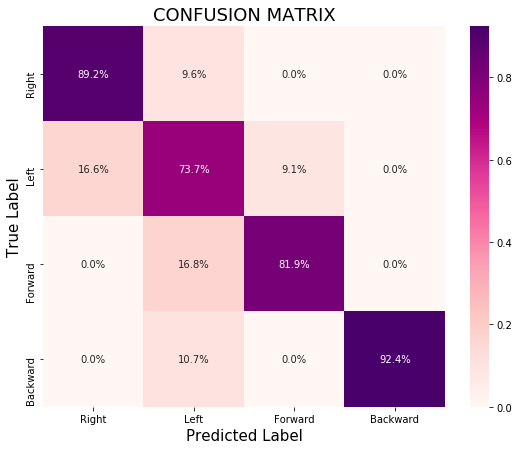

In [47]:
cf_matrix = confusion_matrix(Y_test, y_pred_lda)
plt.figure( figsize=(9, 7), facecolor='w', edgecolor='k')
sns.heatmap(cf_matrix/(np.sum(cf_matrix)/4), cmap = 'RdPu', annot= True, fmt='.1%',
            xticklabels=['Right', 'Left', 'Forward','Backward'], yticklabels=['Right', 'Left', 'Forward','Backward'])
plt.xlabel('Predicted Label', fontsize=15)
plt.ylabel('True Label', fontsize=15)
plt.title('CONFUSION MATRIX', fontsize=18)
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

### Quadratic Discriminant Analysis

In [48]:
qda = QuadraticDiscriminantAnalysis()
model_qda = qda.fit(X_train, np.ravel(Y_train))

In [49]:
y_pred_qda = model_qda.predict(X_test)

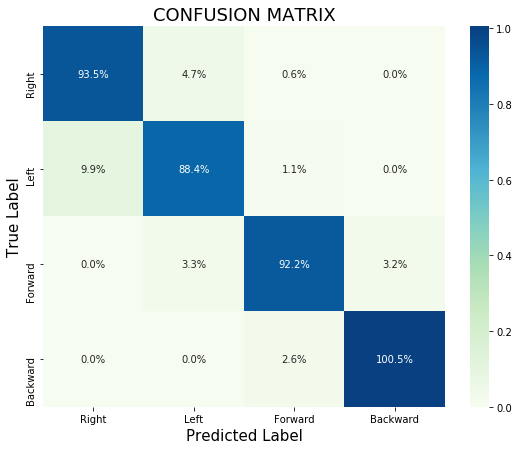

In [50]:
cf_matrix = confusion_matrix(Y_test, y_pred_qda)
plt.figure( figsize=(9, 7), facecolor='w', edgecolor='k')
sns.heatmap(cf_matrix/(np.sum(cf_matrix)/4), cmap = 'GnBu', annot= True, fmt='.1%',
            xticklabels=['Right', 'Left', 'Forward','Backward'], yticklabels=['Right', 'Left', 'Forward','Backward'])
plt.xlabel('Predicted Label', fontsize=15)
plt.ylabel('True Label', fontsize=15)
plt.title('CONFUSION MATRIX', fontsize=18)
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [51]:
score_qda = accuracy_score(Y_test, y_pred_qda)*100
print("Accuracy Score of QDA:", score_qda)

Accuracy Score of QDA: 93.65


### Naive Bayes

In [52]:
NB = GaussianNB()
model_NB = NB.fit(X_train, np.ravel(Y_train));

In [53]:
y_pred_NB = model_NB.predict(X_test)

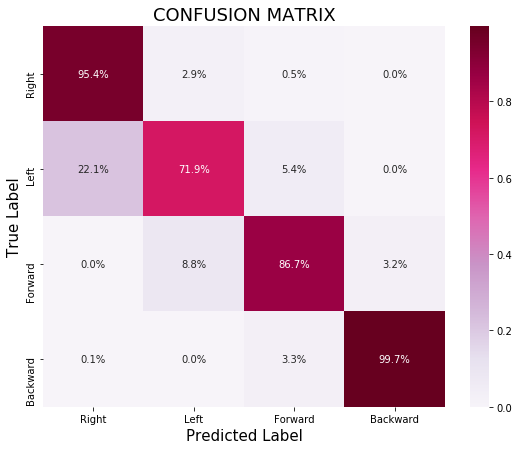

In [54]:
cf_matrix = confusion_matrix(Y_test, y_pred_NB)
plt.figure( figsize=(9, 7), facecolor='w', edgecolor='k')
sns.heatmap(cf_matrix/(np.sum(cf_matrix)/4), cmap = 'PuRd', annot= True, fmt='.1%',
            xticklabels=['Right', 'Left', 'Forward','Backward'], yticklabels=['Right', 'Left', 'Forward','Backward'])
plt.xlabel('Predicted Label', fontsize=15)
plt.ylabel('True Label', fontsize=15)
plt.title('CONFUSION MATRIX', fontsize=18)
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [55]:
score_nb = accuracy_score(Y_test, y_pred_NB)*100
print("Accuracy Score of Naive Bayes:", score_nb)

Accuracy Score of Naive Bayes: 88.425


In [56]:
data = [['Bagged Trees', cvscore_bg, bg_score],['Boosted Trees', cvscore_ada, ada_score],
        ['K Nearest Neighbors', cvscore_knn, knn_score],['Decision Trees', cvscore_dtc, score_dtc],
        ['Support Vector Machine - Linear', cvscore_lin], ['Support Vector Machine - Sigmoid', cvscore_sig], 
        ['Support Vector Machine - Poly', cvscore_pol], ['Support Vector Machine - RBF', cvscore_rbf, ],
        ['Linear Discriminant Analysis', 'NaN' , score_lda],['Quadractic Discriminant Analysis', 'Nan' , score_qda],
        ['Naive Baiyes', 'NaN', score_nb]]
df_score = pd.DataFrame(data, columns = ['Model', 'Cross-Val Score', 'Train-Test Score']) 
df_score

,Model,Cross-Val Score,Train-Test Score
0,Bagged Trees,96.8483,96.675
1,Boosted Trees,77.59,56.275
2,K Nearest Neighbors,90.45,96.075
3,Decision Trees,88.525,96.025
4,Support Vector Machine - Linear,86.37,NaN
5,Support Vector Machine - Sigmoid,75.84,NaN
6,Support Vector Machine - Poly,88.555,NaN
7,Support Vector Machine - RBF,88.47,NaN
8,Linear Discriminant Analysis,NaN,84.300
9,Quadractic Discriminant Analysis,Nan,93.650


## Accuracy Analysis

After testing the data on 8 classification models we have come to the conclusion shown through the df_score dataframe that the highest accuracy of both cross validation and train test split is attained by Bagged Trees and following it we have the train-test split accuracy of Decision trees and K nearest neighbors.
